In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline 

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[-3.25571705,  7.37076297],
       [-1.32894248,  7.01185871],
       [ 2.07039068, -2.98982752],
       ...,
       [-1.74018037,  7.82230911],
       [-3.92005916, -5.89213062],
       [ 1.30344852, -4.11969517]])

In [4]:
y

array([0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1,

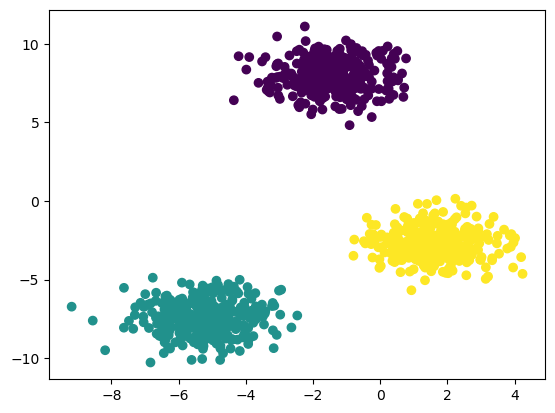

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [13]:
import warnings
warnings.filterwarnings('ignore')
## Elbow method to selevt K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1340.0000000000005,
 509.0042115353796,
 89.32629938853225,
 72.15346555595075,
 56.72996250753829,
 41.811340606867944,
 37.68879282745548,
 34.30871735918183,
 30.43402356595701,
 27.95228870897086]

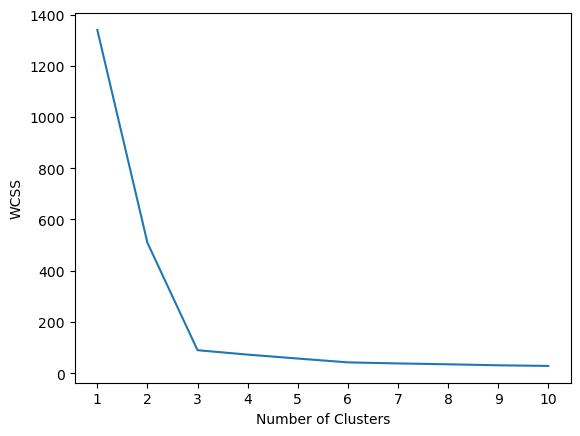

In [15]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [18]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1,
       2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1,
       2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1,

In [19]:
y_pred=kmeans.predict(X_test_scaled)

In [20]:
y_pred

array([1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1,
       0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1,

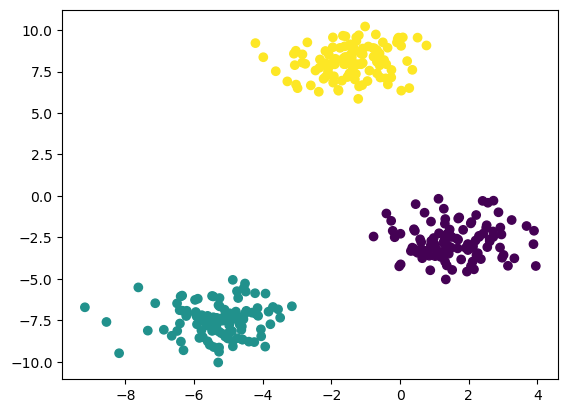

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [23]:
## Validating the k value
## kneelocator
## Silhoutee scoring 

In [24]:
## kneelocator
!pip install kneed 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [25]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [27]:
kl.elbow

3

In [28]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients


[0.6223638647352869,
 0.7847647020519257,
 0.6649753098479863,
 0.5502198930767761,
 0.4397418991440398,
 0.4123493943552732,
 0.3768594382188886,
 0.3586300028059887,
 0.3597274076739754]

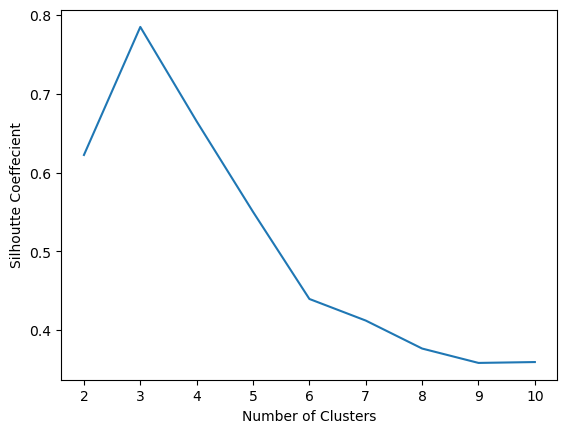

In [32]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()